In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
X1 = np.array([[0.1,0.5],[0.2,0.3],[0.2,0.4],[0.3,0.2],[0.3,0.3],[0.4,0.2],[0.5,0.1],[0.5,0.9],[0.6,0.8],[0.7,0.7],[0.7,0.8],[0.8,0.6],[0.8,0.7],[0.9,0.5]])
Y1 = np.array([0,1,0,1,0,0,0,1,1,1,0,1,0,1])
print(X1.shape)
print(Y1.shape)

(14, 2)
(14,)


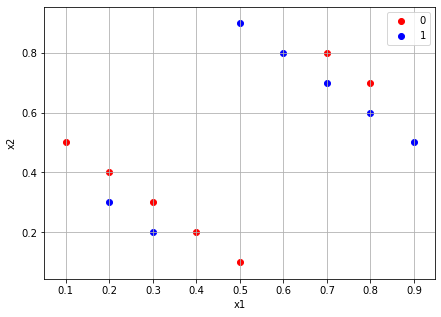

In [3]:
label1 = (Y1==0)
label2 = (Y1==1)
plt.scatter(X1[label1,0],X1[label1,1],color='red')
plt.scatter(X1[label2,0],X1[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('0','1'))
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [4]:
X2 = np.array([[0.0,2.0],[0.75,2.0],[1.5,2.0],[2.0,0.0],[2.0,0.5],[2.0,1.0],[2.0,1.5],[2.0,2.5],[2.0,3.0],[2.0,3.5],[2.0,4.0],[2.5,2.0],[3.25,2.0],[4.0,2.0]])
Y2 = np.array([0,0,0,1,1,1,1,1,1,1,1,0,0,0])
print(X2.shape)
print(Y2.shape)

(14, 2)
(14,)


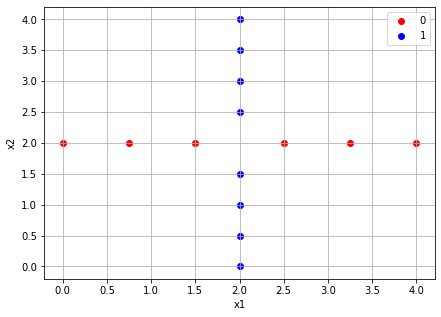

In [5]:
label1 = (Y2==0)
label2 = (Y2==1)
plt.scatter(X2[label1,0],X2[label1,1],color='red')
plt.scatter(X2[label2,0],X2[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('0','1'))
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [6]:
def olo_cv(x,y,k=3):
    L = x.shape[0]
    test_err = np.zeros_like(y,dtype=float)
    for i in range(L):
        xtest = x[i]
        ytest = y[i]
        mask = np.ones(len(y),dtype=bool)
        mask[i] = False
        xtrain = x[mask]
        ytrain = y[mask]
        dk = np.zeros_like(ytrain,dtype=float)
        for j in range(xtrain.shape[0]):
            dk[j] = LA.norm((xtest - xtrain[j]))
        dk_argsort = np.argsort(dk)
        idx_k = dk_argsort[:k]
        y_k = ytrain[idx_k]
        count_0 = len(y_k[y_k==0])
        count_1 = len(y_k[y_k==1])
        if (count_0>count_1):
            ypred = 0
        elif (count_1>count_0):
            ypred = 1
        test_err[i] = (ytest-ypred)**2
        
    cv_err = np.mean(test_err)
    return cv_err

In [7]:
karr = np.array([1,3,5,7])
cv_err_x1 = np.zeros_like(karr,dtype=float)
cv_err_x2 = np.zeros_like(karr,dtype=float)
for i in range(len(karr)):
    cv_err_x1[i] = olo_cv(X1,Y1,karr[i])
    cv_err_x2[i] = olo_cv(X2,Y2,karr[i])

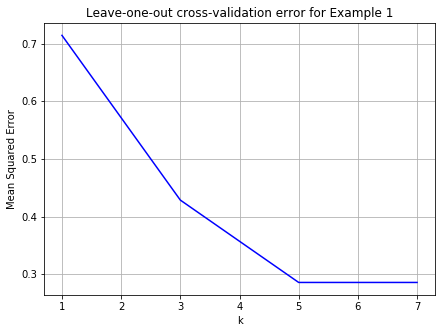

In [8]:
plt.plot(karr,cv_err_x1,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Leave-one-out cross-validation error for Example 1')
plt.grid(b=True)

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

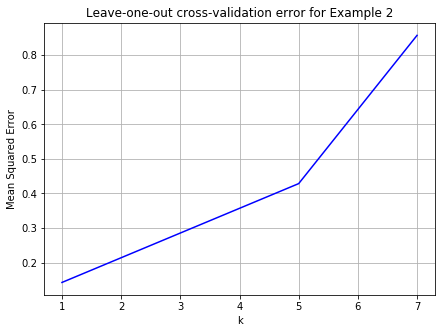

In [9]:
plt.plot(karr,cv_err_x2,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Leave-one-out cross-validation error for Example 2')
plt.grid(b=True)

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [11]:
print(cv_err_x1)
print(cv_err_x2)

[0.71428571 0.42857143 0.28571429 0.28571429]
[0.14285714 0.28571429 0.42857143 0.85714286]


In [12]:
karra = np.array([1,13])
cv_err_x1a = np.zeros_like(karra,dtype=float)
for i in range(len(karra)):
    cv_err_x1a[i] = olo_cv(X1,Y1,karra[i])

In [13]:
print(cv_err_x1a)

[0.71428571 1.        ]
